# Use deep learning for image classification

This Python notebook shows you how to use [deep learning](https://en.wikipedia.org/wiki/Deep_learning) to build a classification model that maps images of single digit numbers to their corresponding numeric representations.

This notebook is adapted from the deep learning tutorial that describes the important deep learning concepts and includes code snippets at http://www.pyimagesearch.com/2014/09/22/getting-started-deep-learning-python/.


## Table of contents

1. [Load libraries](#load_libraries)
1. [Access data](#access_data)
1. [Train the pattern recognition model](#train_model)
1. [Summary](#summary)


<img src="https://www.wolfram.com/mathematica/new-in-10/enhanced-image-processing/HTMLImages.en/handwritten-digits-classification/smallthumb_10.gif" alt="Images of numbers to numeric representation" title="Title text" />

<a id="load_libraries"></a>
## Load libraries

If you haven't already installed it, run the following cell to install the `nolearn` deep learning Python library in your notebook environment. Then, import the the libraries that you will be using for this notebook.

In [12]:
#!pip install --user nolearn

In [13]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<a id="access_data"></a>
## Access data

MNIST is a database of handwritten numbers. Because it uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.

Run the following cell to get the MNIST data set of images of handwritten numbers:

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
mnist_images = mnist.train.images
mnist_labels = mnist.train.labels

Then split the images into training and testing data sets:

In [16]:
trX, teX, trY, teY = train_test_split(mnist_images, mnist_labels.astype("int0"), test_size = 0.33)
print "Number of images for training:", trX.shape[0]
print "Number of images used for testing:", trY.shape[0]
pix = int(np.sqrt(teX.shape[1]))
print "Each image is:", pix, "by", pix, "pixels"

Number of images for training: 36850
Number of images used for testing: 36850
Each image is: 28 by 28 pixels


<a id="train_model"></a>
## Train the pattern recognition model

This notebook shows you how to train a pattern recognition model for handwritten numbers by using the Deep Belief Network (DBN) solver.
The DBN solver is trained on approximately 47,000 images each with 784 pixels (28 by 28 before vectorizing) and uses 300 hidden units to support more efficient learning rates. The ten output units correspond to each of the single digit numbers (0 - 9). The results of the learning algorithms have an accuracy of 98 percent.

Run the following cell to train the DBN on handwritten digits. For details on the parameters used in the function, see  http://www.pyimagesearch.com/2014/09/22/getting-started-deep-learning-python/.


In [17]:
dbn = DBN(
    [trX.shape[1], 300, 10], 
    learn_rates = 0.3,
    learn_rate_decays = 0.9,
    epochs = 10, 
    verbose = 1) # set verbose to 0 for not printing output
dbn.fit(trX, trY)

[DBN] fitting X.shape=(36850, 784)
[DBN] layers [784, 300, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.302399697982
  err  0.0909782608696
  (0:00:06)


100%


Epoch 2:
  loss 0.16392505376
  err  0.0472282608696
  (0:00:06)


100%


Epoch 3:
  loss 0.129764604138
  err  0.0372554347826
  (0:00:07)


100%


Epoch 4:
  loss 0.0924301073765
  err  0.02625
  (0:00:07)


100%


Epoch 5:
  loss 0.0641331532715
  err  0.0197282608696
  (0:00:09)


100%


Epoch 6:
  loss 0.0503559336589
  err  0.0151902173913
  (0:00:08)


100%


Epoch 7:
  loss 0.0375154355314
  err  0.0111684782609
  (0:00:09)


100%


Epoch 8:
  loss 0.0285735774235
  err  0.00847826086957
  (0:00:11)


100%


Epoch 9:
  loss 0.0238471906083
  err  0.0075
  (0:00:09)


100%


Epoch 10:
  loss 0.0158740738717
  err  0.00434782608696
  (0:00:12)


Then evaluate the the quality of the predictions for each digit:

In [18]:
preds = dbn.predict(teX)
print classification_report(teY, preds)

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1798
          1       0.99      0.99      0.99      2082
          2       0.98      0.97      0.97      1810
          3       0.96      0.97      0.97      1830
          4       0.98      0.97      0.97      1807
          5       0.97      0.97      0.97      1642
          6       0.98      0.99      0.98      1770
          7       0.98      0.97      0.98      1838
          8       0.97      0.97      0.97      1774
          9       0.97      0.97      0.97      1799

avg / total       0.98      0.98      0.98     18150



Define a function that randomly selects a few of the test images and their predictions:

Actual digit is 9 predicted 3


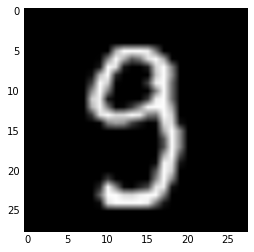

In [19]:
def randIm():
    i = np.random.choice(np.arange(0, len(teY)), size = (1,))
    pred = dbn.predict(np.atleast_2d(teX[i]))
    image = (teX[i] * 255).reshape((28, 28)).astype("uint8")
    # show the prediction
    print "Actual digit is", teY[i][0], "predicted", pred[0]
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')   

randIm() 

Run this function several times to see randomly picked examples from the test data set:

Actual digit is 6 predicted 6


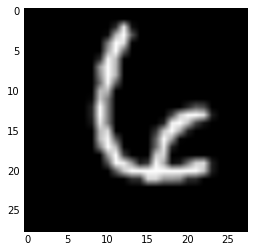

In [20]:
randIm()

Actual digit is 2 predicted 2


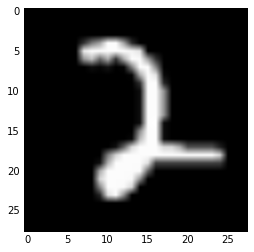

In [21]:
randIm()

<a id="summary"></a>
## Summary

In this Python notebook, you learned how to access the MNIST database that contains sample handwritten numbers. You learned to train the DBN solver to recognize handwritten single digit numbers and evaluate the predicted numeric output.

## Authors

**Jorge Castañón** is a data scientist at IBM Analytics, specializing in machine learning and text analytics using Apache Spark and Hadoop.

Some of the code used in this notebook was contributed by **Adrian Rosebrook**, entrepreneur and Chief PyImageSearcher at www.pyimagesearch.com. 

<hr>
Copyright &copy; IBM Corp. 2016. This notebook and its source code are released under the terms of the MIT License.
